### 목표 : 부족한 피쳐를 조합/생성하여 모델 성능 향상
- 특성공학 => 피쳐 추출/선택/생성
- 비선형의 데이터에 대한 피쳐 생성 => 곡선형태의 회귀선 생성
- 모듈 : sklearn.preprocessing 내에 포함
- 데이터 : fish.csv
- 피쳐 : Perch의 Height, Length, Width
- 타겟 : Perch의 Weight
- 학습유형 : 지도학습

(1) 전처리 피쳐 조합 생성 살펴보기

In [1]:
# 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# 인스턴스 생성
poly = PolynomialFeatures(include_bias=False)

In [3]:
poly.fit([[2,3]])

PolynomialFeatures(include_bias=False)

In [4]:
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

In [5]:
poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit([[2, 3]])

PolynomialFeatures(degree=5, include_bias=False)

In [6]:
poly.transform([[2, 3]])

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [7]:
# 3H5 = 7C5 = 7C2 = 21
# 상수항만 안 나타나는 듯 (intercept 어떻게 알아내지?)
# include_bias=False 라서?
poly.get_feature_names_out(), len(poly.get_feature_names_out())

(array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
        'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
        'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
       dtype=object),
 20)

[2] Perch 데이터를 최대한 만족하는 회귀선을 찾기

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# 데이터 준비
data_filename = '../DATA/fish.csv'
dataDF = pd.read_csv(data_filename)
dataDF

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [10]:
dataDF.drop('Diagonal', axis='columns', inplace=True)

In [11]:
is_perch = dataDF['Species'] == 'Perch'
dataDF[is_perch].head()

,Species,Weight,Length,Height,Width
72,Perch,5.9,8.4,2.1120,1.4080
73,Perch,32.0,13.7,3.5280,1.9992
74,Perch,40.0,15.0,3.8240,2.4320
75,Perch,51.5,16.2,4.5924,2.6316
76,Perch,70.0,17.4,4.5880,2.9415


In [12]:
perchDF = dataDF[is_perch]
perchDF.reset_index(drop=True, inplace=True)
perchDF.head()

,Species,Weight,Length,Height,Width
0,Perch,5.9,8.4,2.1120,1.4080
1,Perch,32.0,13.7,3.5280,1.9992
2,Perch,40.0,15.0,3.8240,2.4320
3,Perch,51.5,16.2,4.5924,2.6316
4,Perch,70.0,17.4,4.5880,2.9415


[2-2] 데이터 확인 <hr>
- 학습 유형 결정을 위한 단계
- 피쳐 스케일링 진행 여부 체크

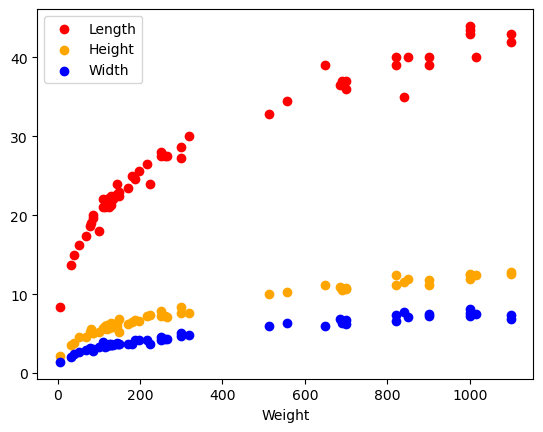

In [13]:
plt.scatter(perchDF['Weight'], perchDF['Length'], c='r', label='Length')
plt.scatter(perchDF['Weight'], perchDF['Height'], c='orange', label='Height')
plt.scatter(perchDF['Weight'], perchDF['Width'], c='b', label='Width')
plt.xlabel('Weight')
plt.legend()
plt.show()

In [14]:
perchDF[perchDF.columns[1:]].corr()['Weight']

Weight    1.000000
Length    0.958656
Height    0.968441
Width     0.963943
Name: Weight, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [16]:
# Linear Regression 으로 해보기
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(perchDF.iloc[:, 3:], perchDF['Weight'], test_size=0.3)
lin_scoreList = []

In [17]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)
scaled_x_train = std_scaler.transform(x_train)
scaled_x_test = std_scaler.transform(x_test)

lin_reg.fit(scaled_x_train, y_train)
lin_scoreList.append(lin_reg.score(scaled_x_train, y_train))
lin_scoreList.append(lin_reg.score(scaled_x_test, y_test))

print(lin_scoreList)

[0.947304702884166, 0.9271457786731699]


In [18]:
# Polynomial Regression 으로 해보기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True, degree=2)

poly_scoreList = []

poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)

lin2 = LinearRegression()
lin2.fit(poly_x_train, y_train)

poly_scoreList.append(lin2.score(poly_x_train, y_train))
poly_scoreList.append(lin2.score(poly_x_test, y_test))

print(poly_scoreList)

[0.9851894481525824, 0.9740451962368719]
